### Project 9 -- Python SQLite workflow to explore, analyze, and visualize

### Introduction 
In this project, we'll work with data from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

- __population__ - The population as of 2015.
- __population_growth__ - The annual population growth rate, as a percentage.
- __area__ - The total land and water area.

We are using SQLite database called factbook.db from this [GitHub repo](https://github.com/factbook/factbook.sql/releases). In this project, we'll explore the Python SQLite workflow to explore, analyze, and visualize data from this database. First things first, let's get familiar with the database.

In [29]:
# importing SQLite & pandas
import sqlite3
import pandas as pd

# connecting the database to SQLite
conn = sqlite3.connect("factbook.db")
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
# Ceated an instance 
cursor = conn.cursor()
# execute and fecth the database
cursor.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

We are going to use pandas dataframe to just read in the results because most data analysts and data scientists in the industry use a SQL GUI based tool, which:

- let us write queries and save them for later.
- let us run queries against multiple enterprise database systems (MySQL, Postgres, etc.).
- return results as a table.
- create standard visualizations like line charts, bar plots, and histograms from the results table without any programming.

Some examples of GUI based SQL tools:

- [Mode Analytics](https://mode.com/product/)
- [Periscope Data](https://www.periscopedata.com/platform)
- [MySQL Workbench](https://www.mysql.com/products/workbench/)
- [Jack DB](https://www.jackdb.com/)

But we are uisng pandas and matplotlib to display results neatly and visualize them because they let us focus on practicing thinking and working in SQL.

In [30]:
# reading into the pandas dataframe and 
# to return information on the tables in the database.
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [31]:
#Ruing a query that returns the first 5 rows of the facts table in the database.
q2 = "select * from facts limit 5"
#  to return information on the tables in the database.
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


Here are the descriptions for some of the columns:

- __name__ - The name of the country.
- __area__ - The total land and sea area of the country.
- __population__ - The country's population.
- __population_growth__- The country's population growth as a percentage.
- __birth_rate__ - The country's birth rate, or the number of births a year per 1,000 people.
- __death_rate__ - The country's death rate, or the number of death a year per 1,000 people.
- __area__ - The country's total area (both land and water).
- __area_land__ - The country's land area in square kilometers.
- __area_water__ - The country's waterarea in square kilometers.

### Summary Statistics
Let's start by calculating some summary statistics and look for any outlier countries.

Writing a single query that returns the:

- Minimum population
- Maximum population
- Minimum population growth
- Maximum population growth

In [32]:
# a single query 
q3 = '''
select min(population) min_pop, max(population) max_pop, 
min(population_growth) min_pop_grwth, max(population_growth) max_pop_grwth 
from facts
'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_grwth,max_pop_grwth
0,0,7256490011,0.0,4.02


A few things stick out from the summary statistics in the last screen:

- there's a country with a population of __0__
- there's a country with a population of __7256490011__ (or more than 7.2 billion people)

### Outliers
Let's zoom in on just these countries.
- Writing a query that returns the countrie(s) with a population of 7256490011.

In [33]:
q4 = '''
select *
from facts
where population == (select max(population) from facts);
'''

pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


- Write a query that returns the countrie(s) with a population of 0.

In [34]:
q5 = '''
select *
from facts
where population == (select min(population) from facts);
'''

pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook page for Antarctica:<img src="https://s3.amazonaws.com/dq-content/257/fb_antarctica.png" alt="Alt text that describes the graphic" title="Title text" />

### Histograms
Let's move on to generating histograms for the rest of the countries in the table, ignoring these 2 rows. We want to write a query that returns all of the values in the columns we want to visualize.

Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:

- population
- population_growth
- birth_rate
- death_rate

In [37]:
q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fb82e8e80>,
      dtype=object)

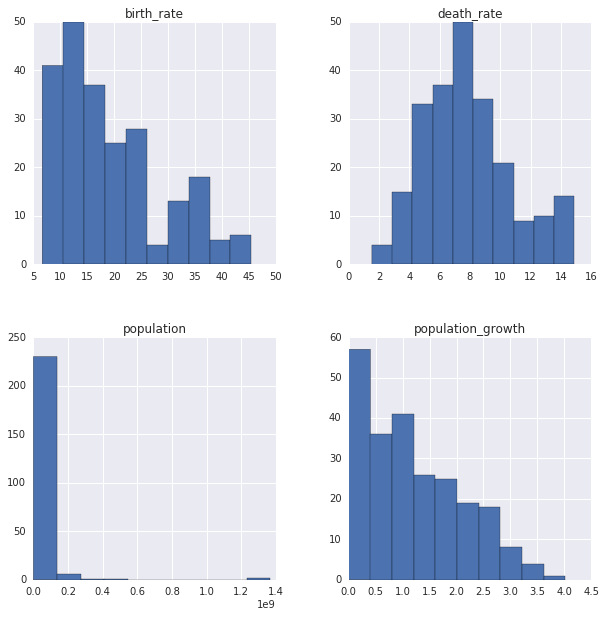

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# using for juypter notebook
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# generating histograms
pd.read_sql_query(q6, conn).hist(ax=ax)

### Which countries have the highest population density?

In [48]:
q7 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


### histogram of population densities

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fadbbd710>],
      dtype=object)

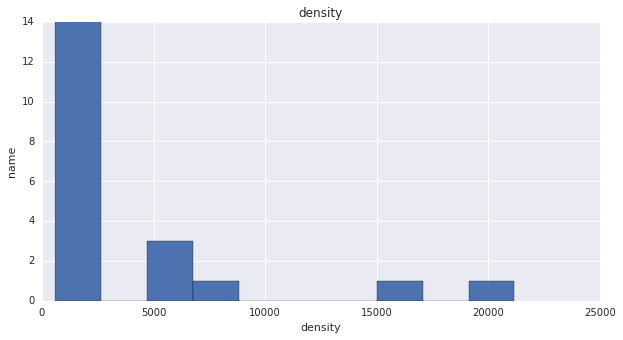

In [64]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)
ax1.set_ylabel('name')
ax1.set_xlabel('density')
pd.read_sql_query(q7, conn).hist(ax=ax1)